In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score



In [2]:
df=pd.read_csv("/content/drive/MyDrive/Excelr/Assignments/DataSets/wine.csv")

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# Separate features & target
X = df.drop(columns=['Type'])
y = df['Type']


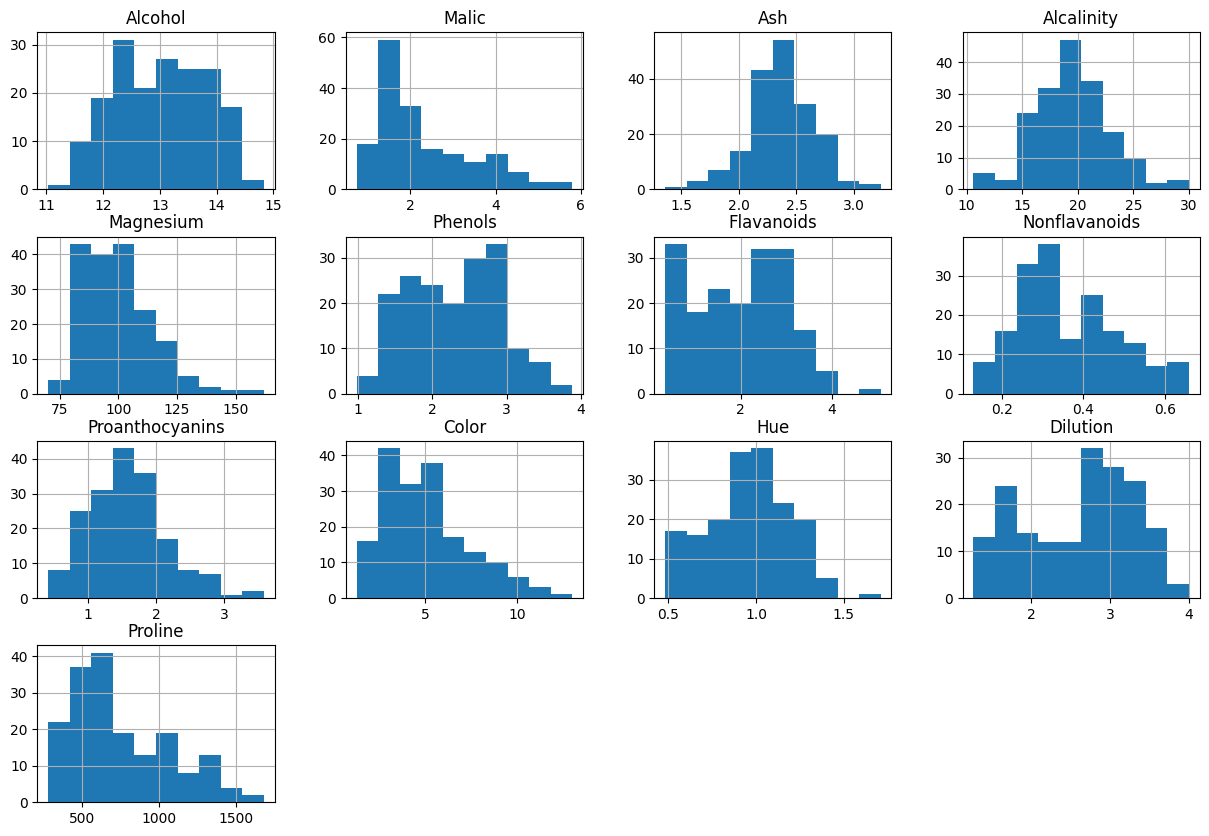

In [8]:
# Histograms
X.hist(figsize=(15,10))
plt.show()


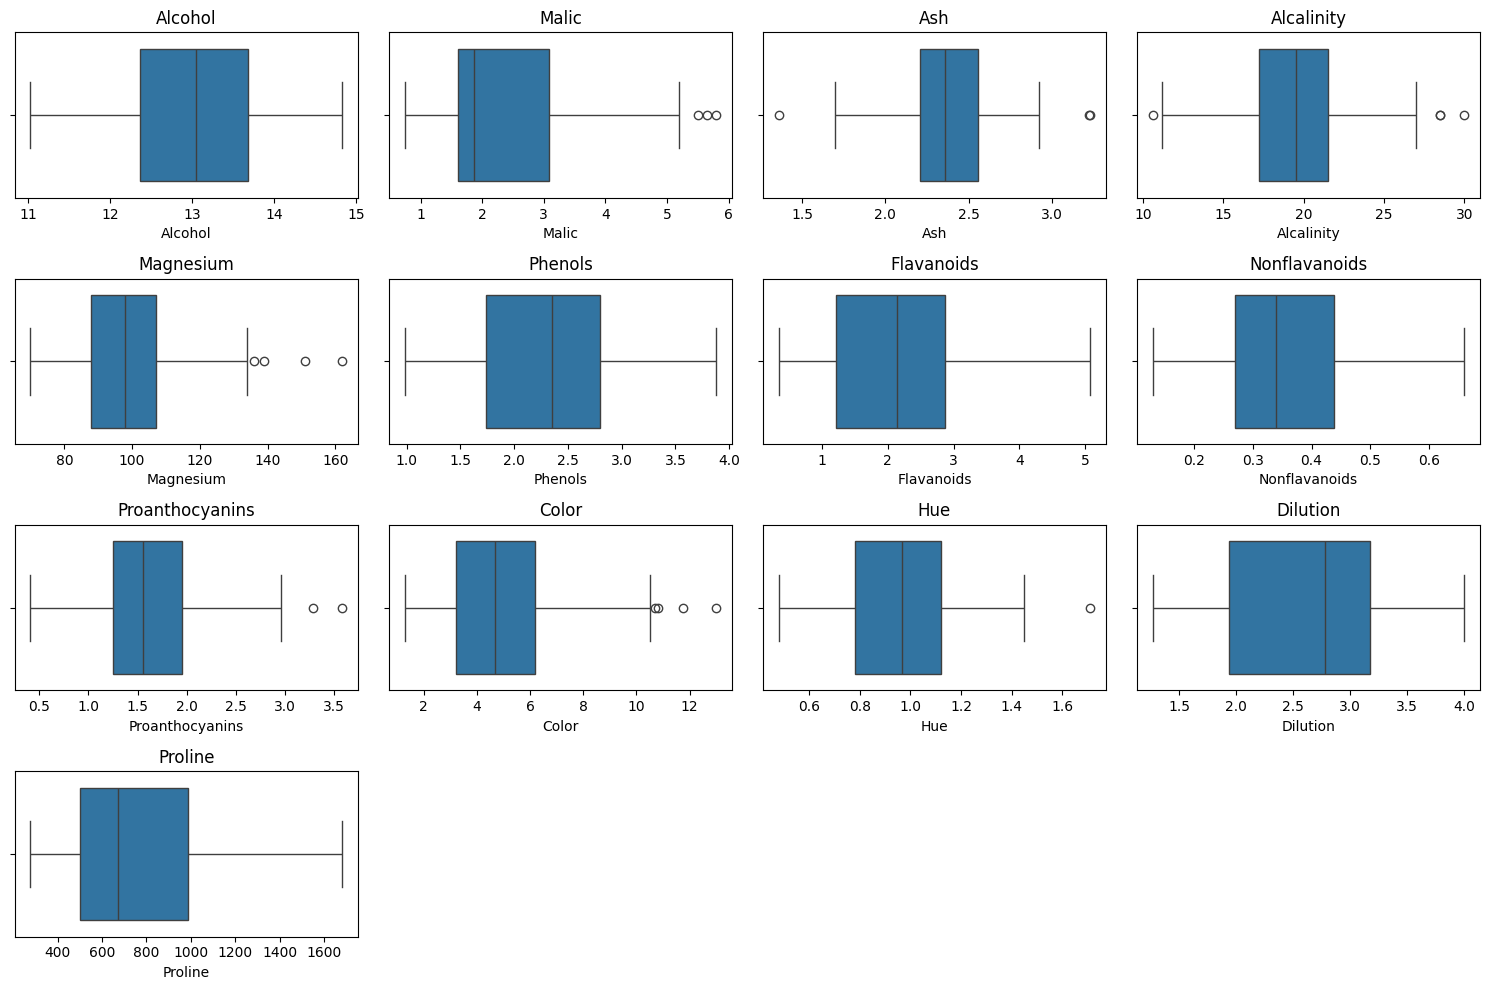

In [9]:
# Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()


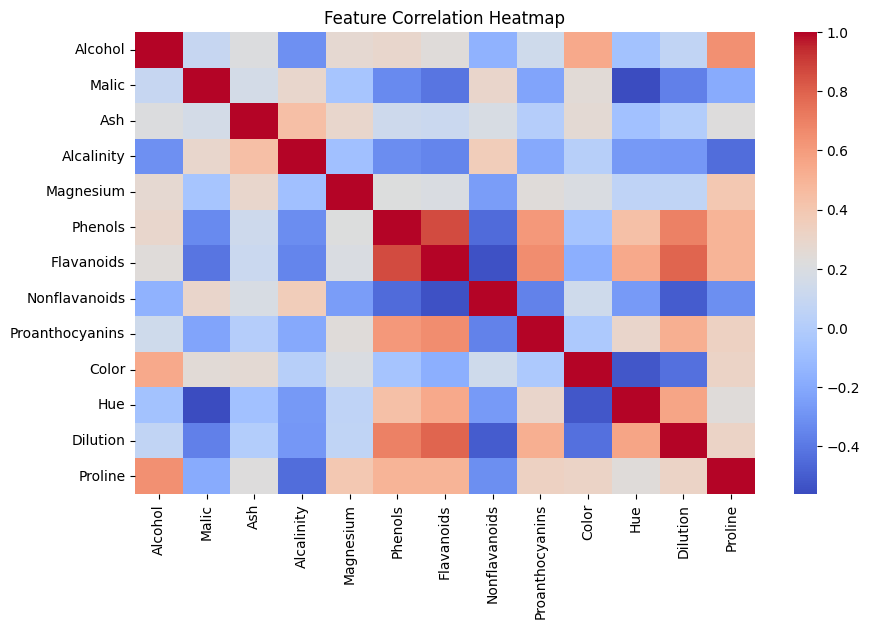

In [10]:

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


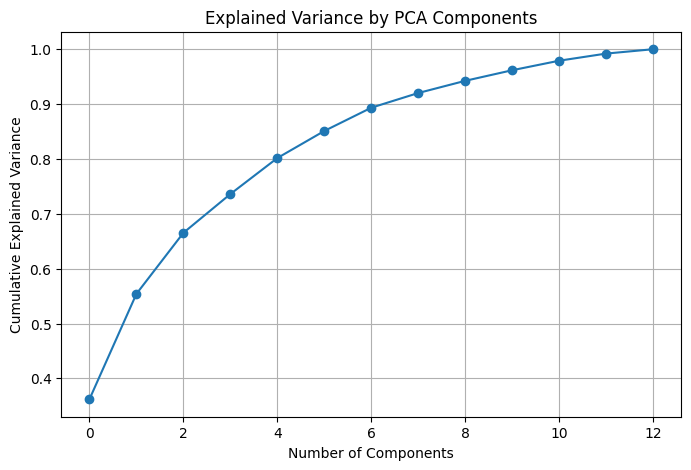

In [13]:
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()


In [14]:

# Choose optimal components (e.g., 2 for visualization, or >90% variance)
pca_opt = PCA(n_components=2)
X_pca_2 = pca_opt.fit_transform(X_scaled)


In [15]:
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)


In [16]:

# Evaluation
print("Silhouette Score (Original):", silhouette_score(X_scaled, labels_orig))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(X_scaled, labels_orig))


Silhouette Score (Original): 0.2848589191898987
Davies-Bouldin Index (Original): 1.3891879777181648


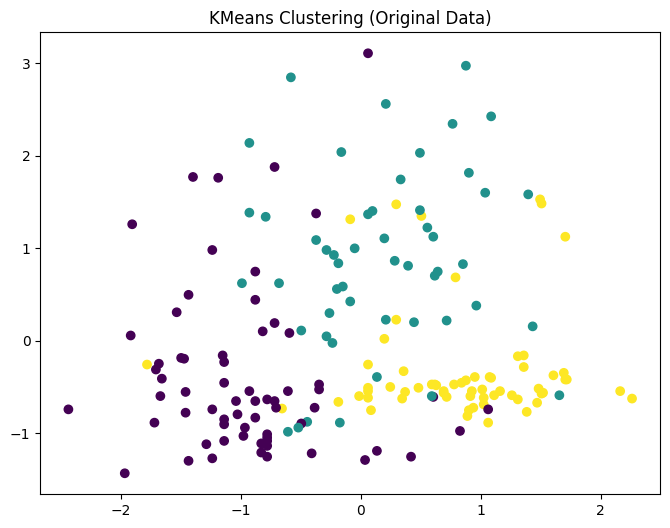

In [17]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_orig, cmap='viridis')
plt.title("KMeans Clustering (Original Data)")
plt.show()


In [18]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_2)


In [19]:

# Evaluation
print("Silhouette Score (PCA):", silhouette_score(X_pca_2, labels_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(X_pca_2, labels_pca))


Silhouette Score (PCA): 0.5601697480957203
Davies-Bouldin Index (PCA): 0.5977226208167409


In [20]:

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=labels_pca, cmap='viridis')
plt.title("KMeans Clustering (PCA Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()s or for visualization.
- Use original features if interpretability of clusters is critical.
"""

SyntaxError: unterminated triple-quoted string literal (detected at line 9) (ipython-input-2140631905.py, line 9)

In [21]:
print("🔹 Clustering Comparison:")
print("- Original Data -> Silhouette:", silhouette_score(X_scaled, labels_orig),
      ", DB Index:", davies_bouldin_score(X_scaled, labels_orig))
print("- PCA Data -> Silhouette:", silhouette_score(X_pca_2, labels_pca),
      ", DB Index:", davies_bouldin_score(X_pca_2, labels_pca))


🔹 Clustering Comparison:
- Original Data -> Silhouette: 0.2848589191898987 , DB Index: 1.3891879777181648
- PCA Data -> Silhouette: 0.5601697480957203 , DB Index: 0.5977226208167409



**Key Findings:**
- PCA reduced dimensionality while preserving most variance.
- Clustering on PCA-transformed data is often more stable and visually interpretable.
- If high-dimensional data is noisy, PCA improves clustering.
- Tradeoff: PCA may lose some information, but it simplifies visualization.

Recommendation:
- Use PCA when dataset has many correlated feature

**Dimensionality Reduction with PCA**


*  PCA helps to remove redundant and correlated features, making models simpler and computationally faster.
*   It improves visualization of high-dimensional data by projecting it into 2D or 3D space.




*   PCA often enhances clustering performance by filtering out noise and focusing only on the components that capture the maximum variance.
*   However, PCA components are linear combinations of features, which makes them less interpretable compared to the original variables.








**Clustering**

* Clustering helps in grouping similar data points without supervision (unsupervised learning).
*   It can reveal hidden structures or patterns in the data that are not visible through traditional statistics.

*   Useful in market segmentation, anomaly detection, customer profiling, and bioinformatics.
*   Performance depends heavily on the quality and scale of features—hence why preprocessing and sometimes PCA are important.










